<a href="https://colab.research.google.com/github/Artificial-i/-1-5/blob/main/Vedio38_43_T5_Fasl4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [ ]:
df=pd.read_csv('car_evaluation.csv')
df.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.shape
df.columns
df.dtypes
df.info()
df.nunique()
df['buying'].value_counts()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import category_encoders as ce

ohe = ce.OneHotEncoder()
X_train_1 = ohe.fit_transform(X_train)
X_test_1 = ohe.transform(X_test)

oe = ce.OrdinalEncoder()
X_train_2 = oe.fit_transform(X_train)
X_test_2 = oe.transform(X_test)

be= ce.BinaryEncoder()
X_train_3 = be.fit_transform(X_train, y_train)
X_test_3 = be.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False and the attribute exists, then check that it is equal to
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False and the attribute exists, then check that it is equal to
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False and the attribute exists, then check that it is equal to
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False a

In [ ]:
import category_encoders as ce
oe = ce.OrdinalEncoder()
X_train = oe.fit_transform(X_train)
X_test = oe.transform(X_test)
X_train , X_test

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  If False and the attribute exists, then check that it is equal to


(      buying  maint  doors  persons  lug_boot  safety
 83         1      1      1        1         1       1
 48         1      1      2        2         1       2
 468        2      1      2        3         2       2
 155        1      2      2        2         1       1
 1043       3      2      3        2         2       1
 ...      ...    ...    ...      ...       ...     ...
 1130       3      3      2        2         3       1
 1294       3      4      1        2         3       3
 860        2      4      1        2         3       1
 1459       4      2      3        1         2       3
 1126       3      3      2        2         2       3
 
 [1157 rows x 6 columns],
       buying  maint  doors  persons  lug_boot  safety
 599        2      2      3        1         3       1
 932        3      1      3        3         3       1
 628        2      2      1        1         3       3
 1497       4      2      1        3         1       2
 1262       3      4      3        2 

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:" , recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

confusion_matrix:
 [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]
accuracy_score: 0.9649122807017544
recall_score: 0.9649122807017544
precision_score: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570



In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=5, random_state=0)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred_100))
print("accuracy_score:", accuracy_score(y_test, y_pred_100))
print("recall_score:", recall_score(y_test, y_pred_100,average='micro'))
print("precision_score:", precision_score(y_test, y_pred_100,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_100)}")

confusion_matrix:
 [[110   6  11   0]
 [  2  11   2   3]
 [  8   0 391   0]
 [  5   4   1  16]]
accuracy_score: 0.9263157894736842
recall_score: 0.9263157894736842
precision_score: 0.9263157894736842

Classification Report:
              precision    recall  f1-score   support

         acc       0.88      0.87      0.87       127
        good       0.52      0.61      0.56        18
       unacc       0.97      0.98      0.97       399
       vgood       0.84      0.62      0.71        26

    accuracy                           0.93       570
   macro avg       0.80      0.77      0.78       570
weighted avg       0.93      0.93      0.93       570



In [ ]:
# برای مشخص کردن اهمیت هر کدام از داده های بالا میتوانیم از مدل زیر استفاده کنیم
fi = rfc.feature_importances_
print(f"feature importances : {fi}")
print(f"sum of feature importances : {fi.sum()}")

feature_importances = pd.Series(data=fi, index=X.columns)
feature_importances=feature_importances.sort_values(ascending=False)
print(f"\vfwature_importances :\n{feature_importances}")

# plt.figure(figsize=(8,6))
# colors = sns.color_palwtte('pasel', len(feature_importances))


feature importances : [0.16069234 0.13414281 0.06653267 0.23538005 0.11159519 0.29165694]
sum of feature importances : 1.0
fwature_importances :
safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64


In [ ]:
# پیدا کردن هاپر
rf = RandomForestClassifier()

params = {
    'n_estimators' : [50, 100,200],
    'max_depth' : [None, 10,15,20],
    'min_samples_split': [2, 5],
    'min_samples_leaf' : [1, 2 ,4],
}

random_search = RandomizedSearchCV(rf, params, n_iter=100, cv=5 , verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters : {random_search.best_params_}")
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("sccuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred, average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassitication Report:\n{classification_report(y_test, y_pred)}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  n_iter = self.n_iter


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
confusion_matrix:
 [[122   2   2   1]
 [  3  11   1   3]
 [  2   0 397   0]
 [  4   0   0  22]]
sccuracy_score: 0.968421052631579
recall_score: 0.968421052631579
precision_score: 0.968421052631579

Classitication Report:
              precision    recall  f1-score   support

         acc       0.93      0.96      0.95       127
        good       0.85      0.61      0.71        18
       unacc       0.99      0.99      0.99       399
       vgood       0.85      0.85      0.85        26

    accuracy                           0.97       570
   macro avg       0.90      0.85      0.87       570
weighted avg       0.97      0.97      0.97       570



In [ ]:
# =========================================================
# +++++++++++++++++++++++++++++++++++++++
# 41:12 =========================================================

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape
df.columns
df.dtypes
df.info()
df.nunique()
# df['buying'].value_counts()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df=df.drop(['PassengerId', 'Name', 'Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [8]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [9]:
# تغییر مقدارهای غیر عددی
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Skewness of Fare: 4.7792532923723545


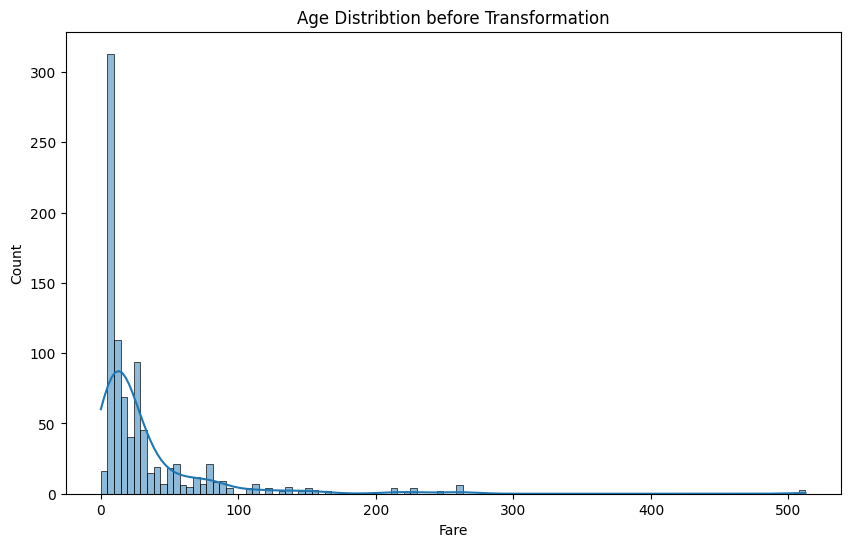

In [10]:
# به دست آوردن چولگی
from scipy.stats import skew
fare_skewness = skew(df['Fare'])
print(f'Skewness of Fare: {fare_skewness}')

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Age Distribtion before Transformation')
plt.show()

In [11]:
import numpy as np


In [13]:
# بعد از به دست اوردن جولگی باید نرمال سازی کنیم

df['Fare'] = np.log1p(df['Fare'])

Skewness of Fare after log transformation: 0.39426283638993376


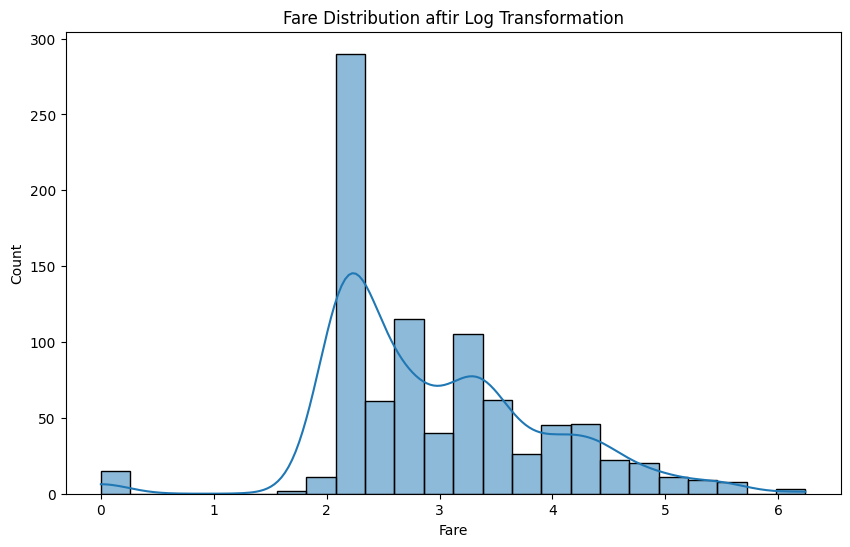

In [14]:
fare_skewness_after = skew(df['Fare'])
print(f'Skewness of Fare after log transformation: {fare_skewness_after}')

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution aftir Log Transformation')
plt.show()

In [18]:

X = df.drop('Survived' , axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,3.384390,True,False,True
733,2,23.0,0,0,2.639057,True,False,True
382,3,32.0,0,0,2.188856,True,False,True
704,3,26.0,1,0,2.180892,True,False,True
813,3,6.0,4,2,3.474293,False,False,True
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,2.157559,False,False,True
270,1,28.0,0,0,3.465736,True,False,True
860,3,41.0,2,0,2.715244,True,False,True
435,1,14.0,1,2,4.795791,False,False,True


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("confusion_matrix:\n",confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report\n{classification_report(y_test, y_pred)}")


confusion_matrix:
 [[105   0]
 [ 74   0]]
accuracy_score: 0.5865921787709497
recall_score: 0.5865921787709497
precision_score: 0.5865921787709497

Classification Report
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
